# ORB(面向快速和旋转的BRIEF)

### 目标
在本章中，
- 我们将了解ORB的基础知识

### 理论

作为OpenCV的狂热者，关于ORB的最重要的事情是它来自“ OpenCV Labs”。该算法由Ethan Rublee，Vincent Rabaud，Kurt Konolige和Gary R. Bradski在其论文《**ORB：SIFT或SURF的有效替代方案**》中提出。2011年，正如标题所述，它是计算中SIFT和SURF的良好替代方案成本，匹配性能以及主要是专利。是的，SIFT和SURF已获得专利，你应该为其使用付费。但是ORB不是！！！

ORB基本上是FAST关键点检测器和Brief描述符的融合，并进行了许多修改以增强性能。首先，它使用FAST查找关键点，然后应用Harris角测度在其中找到前N个点。它还使用金字塔生成多尺度特征。但是一个问题是，FAST无法计算方向。那么旋转不变性呢？作者提出以下修改。

它计算角点位于中心的贴片的强度加权质心。从此角点到质心的矢量方向确定了方向。为了改善旋转不变性，使用x和y计算矩，它们应该在半径$r$的圆形区域中，其中$r$是斑块的大小。

现在，对于描述符，ORB使用Brief描述符。但是我们已经看到，BRIEF的旋转性能很差。因此，ORB所做的就是根据关键点的方向“引导” BRIEF。对于位置$(x_i,y_i)$上n个二进制测试的任何特征集，定义一个$2×n$矩阵S，其中包含这些像素的坐标。然后使用面片的方向$θ$，找到其旋转矩阵并旋转$S$以获得转向（旋转）版本$S_θ$。

ORB将角度离散化为$\frac{2π}{30}$（12度）的增量，并构造了预先计算的Brief模式的查找表。只要关键点方向$θ$在各个视图中一致，就将使用正确的点集$S_θ$来计算其描述符。

BRIEF具有一个重要的特性，即每个位特征具有较大的方差，且均值接近0.5。但是，一旦沿关键点方向定向，它就会失去此属性，变得更加分散。高方差使功能更具区分性，因为它对输入的响应不同。另一个理想的特性是使测试不相关，因为从那时起每个测试都会对结果有所贡献。为了解决所有这些问题，ORB在所有可能的二进制测试中进行贪婪搜索，以找到方差高且均值接近0.5且不相关的测试。结果称为rBRIEF。

对于描述符匹配，使用了对传统LSH进行改进的多探针LSH。该论文说，ORB比SURF快得多，而SIFT和ORB描述符比SURF更好。在全景拼接等低功耗设备中，ORB是一个不错的选择。

### OpenCV中的ORB

与往常一样，我们必须使用函数**cv.ORB**()或使用feature2d通用接口来创建ORB对象。它具有许多可选参数。最有用的是nFeatures，它表示要保留的最大特征数（默认为500），scoreType表示是对特征进行排名的Harris分数还是FAST分数（默认为Harris分数）等。另一个参数WTA_K决定点数产生定向的BRIEF描述符的每个元素。默认情况下为两个，即一次选择两个点。在这种情况下，为了匹配，将使用NORM_HAMMING距离。如果WTA_K为3或4，则需要3或4个点来生成Brief描述符，则匹配距离由NORM_HAMMING2定义。
下面是显示ORB用法的简单代码。

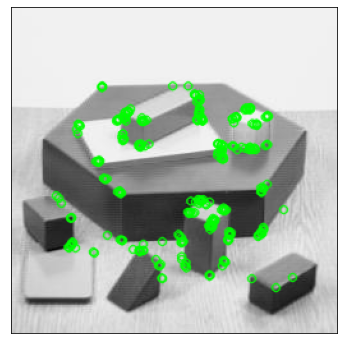

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/blox.jpg',0)

# 初始化ORB检测器
orb = cv.ORB_create()

# 用ORB寻找关键点
kp = orb.detect(img,None)

# 用ORB计算描述符
kp, des = orb.compute(img, kp)

# 仅绘制关键点的位置，而不绘制大小和方向
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

plt.figure(figsize=(6,6))
plt.imshow(img2)
plt.xticks([]), plt.yticks([])
plt.show()

ORB特征匹配，我们将在另一章中进行。

### 附加资源

1. Ethan Rublee, Vincent Rabaud, Kurt Konolige, Gary R. Bradski: ORB: An efficient alternative to SIFT or SURF. ICCV 2011: 2564-2571.

### 练习